# Day1: Handling Files and Introduction to Librosa

Librosa is populay Python library for audio processing, and quite popular for extracting features audio features.

### Let's set up the environment for this example (importing packages and configuring options)

In [1]:
#import numpy
import numpy as np

#import librosa and display the library verion installed in yoru system
import librosa, librosa.display
print(librosa.__version__)

#import matplotlib 
import matplotlib.pyplot as plt

# Render plots interactively in the notebook (not a must)
#alternatively use matplotlib inline or matplotlib notebook or matplotlib nbagg
%matplotlib nbagg

#select a different color-scheme for the plots
import matplotlib.style as ms
ms.use('seaborn-muted')

#importing audio widget from IPython.display for audio playback
from IPython.display import Audio

0.7.0


### Load an audio file, display the duration, plot the waveform, and listen to it

Librosa can open various tyoe of audio files. This include the most popular compressed and uncompressed formats.
When working audio files sourced from the internet, you may end up having various sampling rate and number of channel (this can cause errors or inconsisten features).
Librosa [load function](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load) can automatically resample audio to a give sampling rate and merge the arbitrary number of channels to mono.

Unless you are doing spatial-audio stuff, working with mono files samples at 22050 Hz is fine (the playback wont be high-fidelity, but this is not the goal here). Psychoacoustically-speaking, we can barely hear above 14 kHz. Using a lower samplign rate will save lot of memory and computation. Moreover, components at high frrequency may be just noisy for the ML task (this is not an absolute truth!)

0.4839002267573696
0.484


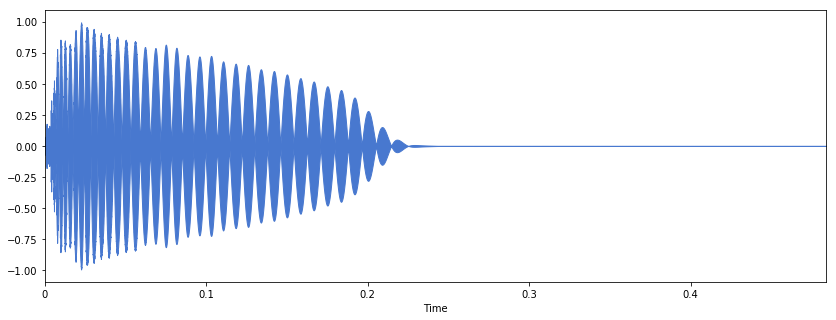

In [2]:
#chosing the sampling rate
sr = 22050

#filename including path
file = './Data/kick.wav'

#the load function returns the signal and the sampling rate
#we have to read sr back, we can't skip it or you can use read it to a dummy variable
signal, sr = librosa.load(file, sr, mono=True)

#display the duration in seconds (this is really just number_of_samples/sampling_rate)
print(librosa.samples_to_time(len(signal), sr))

#display file duration in seconds in a more readable format wit less decimals (or multiply it by 1000 and get ms)
print('{:2.3f}'.format(librosa.samples_to_time(len(signal), sr)))

#setting the size of the figure (not a must)
plt.figure(figsize=(14, 5))
#display the waveform (mind that we are not using matplotlib here!)
librosa.display.waveplot(signal, sr=sr)

#this wont play the audio but it will create a widget from which you can play
#make sure the sampling rate is correct (what happens if you change it?)
#place this at the end of the code cell, otherwise subsequent plots may override it
Audio(signal, rate=sr)

### Exercise 1
a) Repeat the above using the files openhat.wav and snapseter.wav (both in the Data folder).

b) kick.wav, openhat.wav and snapseter.wav have different sampling rates and number of channel. Can you display their original sampling rate and number of channel? Hint: remove the extra parameter to the librosa load, and use [np.shape()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html) - the signal you load from librosa are numpy arrays.


c) can you do resampling and merge to mono outside the load function? Hint: use [librosa core fuctions](https://librosa.github.io/librosa/core.html)


In [ ]:
#write your code here

### Computing scalar features
The code below computes and display [spectral centroid](https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html) and [spectral flatness](https://librosa.github.io/librosa/generated/librosa.feature.spectral_flatness.html) using librosa.

This time we load a longer sound file.

Try to print the variables *cent* and *flat*, you will notice that these are arrays.

Indeed the centroid and bandwidth are computed (by default) over windows of 2048 samples with an overlap of 512 samples. Can you convert that to seconds (or milliseconds). Mind that the sampling rate is 22050 Hz.

This is called block processing (based on the short-time fourier transform) and is illustrated in the image below. Signals are usually analyzed over sequence of small overlapping windows (especially if you are converting the data to frequency domain). This process is illustrated in the image below.

![block processing](https://uk.mathworks.com/help/dsp/ref/stft_output.png)

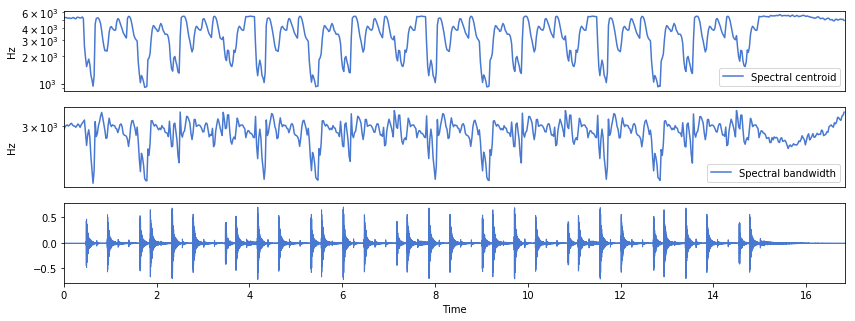

In [3]:
#chosing the sampling rate
sr = 22050

#filename including path
file = './Data/drums.wav'

#the load function returns the signal and the sampling rate
#we have to read sr back, we can't skip it or you can use read it to a dummy variable
signal, sr = librosa.load(file, sr, mono=True)



#computing spectral centroid and bandwidth
cent = librosa.feature.spectral_centroid(signal)
flat = librosa.feature.spectral_bandwidth(signal)

#plotting centroid, bandwidth, and waveform in a 3x1 plot
plt.figure(figsize=(14, 5))
#first subplot
plt.subplot(3, 1, 1)
#using log vertical (y) axis (remember human perception of frequency....)
#and adding a label (displayed later as legend)
plt.semilogy(cent.T, label='Spectral centroid')
#vertical axis lavel
plt.ylabel('Hz')
#getting rid of ticks on horizontal axis (it wont be related to either time or samples but blocks)
plt.xticks([])
#this will help to stretch the plot to the frame
plt.xlim([0, cent.shape[-1]])
#display the legend
plt.legend()
plt.subplot(3, 1, 2)
plt.semilogy(flat.T, label='Spectral bandwidth')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, flat.shape[-1]])
plt.legend()
plt.subplot(3, 1, 3)
#displaying the waveform as well, so we can try to identify eventual correlations 
librosa.display.waveplot(signal, sr=sr)
plt.show()

#this wont play the audio but it will create a widget from which you can play
#make sure the sampling rate is correct (what happens if you change it?)
Audio(signal, rate=sr)



### Computing vectorial features
The code below the [melspectrogram](https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html#librosa.feature.melspectrogram) using librosa.

We use the file we loaded earlier (it's still in the *signal* array).

The mel-spectrogram is a [spectrogram](https://cnx.org/contents/d442r0wh@9.71:4XRHF7jF@22/Spectrograms) (also called sonogram) where the frequency axis is not linear (i.e. frequency points equally distributed between 0Hz and half of the sampling rate), but arranged according to the [mel scale](https://en.wikipedia.org/wiki/Mel_scale), which is more perceptually relevant.

As in the earlier example, the analysis is performed for each block (or window), but instead of computing a single number per window, we compute an array (or vector) of numbers for each window (i.e. we compute the spectrum of each window).

![spectrogram computation](https://cnx.org/resources/febd04586ef83a3d2cd2faf35c5cb27444cf70c4/sig20.png)


In [ ]:
#computing melspectrogram
melspect = librosa.feature.melspectrogram(y=signal)

#plotting me-spectrogram and waveform 2x1 plot 
plt.figure(figsize=(14, 5))
#first subplot
plt.subplot(2, 1, 1)
#plotting mel-spectrogram and display
librosa.display.specshow(librosa.power_to_db(melspect,ref=np.max), y_axis='mel', fmax=8000, x_axis='time')
#adding a colorbar as legend
#plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')
plt.tight_layout()

#second subplot
plt.subplot(2, 1, 2)
#displaying the waveform as well, so we can try to identify eventual correlations 
librosa.display.waveplot(signal, sr=sr)
plt.show()

### Exercise 2
a) Consider the two examples above on scalar and vectorial features. Try to change window and overlap parameters and check how the dimension (np.shape()) of the feature array changes.

b) Try out different type of spectral features (scalar feature example only), or change the input sound file.

c) can you tell what is the size of the vectorial geature (i.e. how manu nymber per window are computed)?

d) try to reduce the number of features per window to 13 (vectorial example only). To do that, create and use a new [mel filterbank](https://librosa.github.io/librosa/generated/librosa.filters.mel.html#librosa.filters.mel)

write your code below, keep the above examples as a reference

In [ ]:
#write your code here

### Cutting audio samples, averaging features, loading audio files from folder

In this example we will load all samples from a folder (one at a time), take the first 200ms of each sample, compute the average of scalar features features (centroid and bandwidth), and organize these in a data structure (a matrix) that we can later use for ML training.

Imagine having a bunch of audio files containing percussive sounds that you want to recognize or organize.
For consistency, let's consider an equal lenght segment from each file (number of samples).
Assume that the attack is well aligned with the beginning of the file (if not you can fix it manually, or learn hot to use librosa onset detection to get rid of the unwanted part).

Then we will compute scalar features on this short sample. Librosa will still perform block processing and five you an array of value. To reduce this to a single value we can take the average or mean. This may not work well in certain cases, so you can consider to work with the entire vector (or matrix in case of spectrograms).

We will do this for 2 features (bandwidth and centroid), but you can add/change as many as you want. Since here we use only two features, we can plot these on a scatter plot.

The goal is to have a data structure (numpy N-dimensional array, or matrix) as the following, where on each row we store the features of a single file (if you prefer you can organize these on columns).


| centroid_1st_file | bandwidth_1st_file | <br>
| centroid_2nd_file | bandwidth_2nd_file | <br>
| centroid_3rd_file | bandwidth_3rd_file | <br>
.... <br>
| centroid_nth_file | bandwidth_nth_file | <br>

If you read (using np.shape()) the size of this data structure you will get a number of row (as the number of samples, and a number of column as the number of features).

At the end, data will be displayed using a [scatter plot](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html)

['drums.wav', 'openhat.wav', 'kick.wav']
current value of idx 0
current value of i drums.wav
loading sample ./Data/Percussive/drums.wav
current value of idx 1
current value of i openhat.wav
loading sample ./Data/Percussive/openhat.wav
current value of idx 2
current value of i kick.wav
loading sample ./Data/Percussive/kick.wav
computed features
[[5195.29578591 3018.08926696]
 [5529.40940727 2829.28036774]
 [ 467.16381196 1191.39309013]]
size of features matrix
(3, 2)


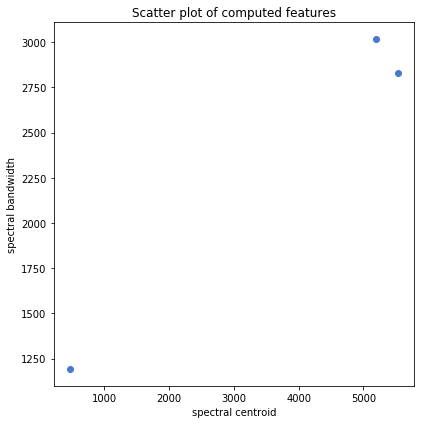

In [9]:
#we use the math package here for various purposes
import math

#we use the os package to get the file list (it can do much more than this)
import os

#get and display the list of file in the folder
filenames = os.listdir('./Data/Percussive')
print(filenames)

#computed features will be placed here
#we pre allocated the space (number of rows is as many as the files, number of column is 2)
features = np.zeros((np.size(filenames),2))

#setting the sampling rate
sr = 22050

#below we create a variable holding how many sample we have to cut/slice to get the initial 200ms
#number of samples in 200 ms is sr * 0.2 (i.e. 200ms)
#however this is likely going to five us a fractional value
#array indexes must be integer, so we use math.ceil round to to closest larger integer
#we remove 1 because we start counting from 0 in numpy arrays
num_samp = (math.ceil(sr * 0.2)-1)

#since we want to perform the same operation on all files (one at a time)
#we use a loop (with index "name")
#in this case the name is an element of filenames,
#and the loop will stop once it goes through all elements of filenames.
#we also use another integet (idx) that we increment by one unit at a time and it
#will range from 0 to the number of elements in file minus one
#the name and idx are sufficient to implement the minor changes at each iteration,
#these include: selecting another file name (i.e. element from filenames)
#and placing the computed features in a different row of the 
#in the loop there are several print that will help you to understand what is going on.

idx = 0

for name in filenames:
    print('current value of idx',idx)
    print('current value of i',name)
    print('loading sample','./Data/Percussive/'+name)
    signal, sr = librosa.load('./Data/Percussive/'+name, sr, mono=True)
    
    #selecting only the first first 200ms
    signal = signal[0:num_samp]
    
    #compute centroid
    temp = librosa.feature.spectral_centroid(signal)
    
    #temp is a numpy array, so there are plenty of available methods (such as mean() to compute the average)
    #placing this in the right place of the feature matrix, i.e. row idx, column 0
    features[idx,0] = temp.mean()
    
    #repeat for bandwidth
    temp = librosa.feature.spectral_bandwidth(signal)
    
    #placing this in the right place of the feature matrix, i.e. row idx, column 1
    features[idx,1] = temp.mean()
    
    
    #increment by one
    idx = idx + 1

    
#display the feature matrix

print('computed features')
print(features)

print('size of features matrix')
print(np.shape(features))


#plotting the features
plt.figure(figsize=(6, 6))

#using the scatter plot create entries (one for each row, i.e. sample)
#each circle is be placed in a position depending by
#centroid (horizontal axis) and bandwidth(vertical axis)
plt.scatter(features[:,0],features[:,1])
plt.title('Scatter plot of computed features')
plt.xlabel('spectral centroid')
plt.ylabel('spectral bandwidth')
plt.tight_layout()

### Exercise 3
a) In the scatter plot from the previous example, the absolute position of each sample is not as important as the relative positions (the absolute may not tell you much unless you are familiar with the feature meaning). Listen to the samples in the folder, and try to reconcile what you hear with what you see (in term of relative positioning) in the scatter plot. Can you guess which circle is which sample?

b) Create 3 folder containing consistent (similar) percussive sounds. Each folder should contain 5 samples (you can get these from freesouns). Repeat the above, analyzing the content of each folder. At the end plot everything in a single scatter plot. Use a different shape or color for each folder (let's call it CLASS).

c) Analyze the scatter plot and the relative position of samples from different classes. Do you think that is possible to separate (i.e. recognize) them using these features? If not, which one are less distinguishible? Try with different combination of features. Stick to two features to simplify the visualization.

In [ ]:
#write your code here